In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing Normalizing
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

#model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/refs/heads/main/cardio_train.csv',sep=(';'))

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Plotting Heatmap (Correlation Matrix)
Lets try to see if we cn reduce the features using different techniques
Lets plot Heatmap to Visualize and find the coefficient of Multicolinearity

In [4]:
#This code will get the coefficient of one variable vs all other variable(Relationship)
#annot =True --> shows numbers inside the box
#annot_kws{}= size of this numbers
#abs()= if you did not use abs(then the plot will be negative also)

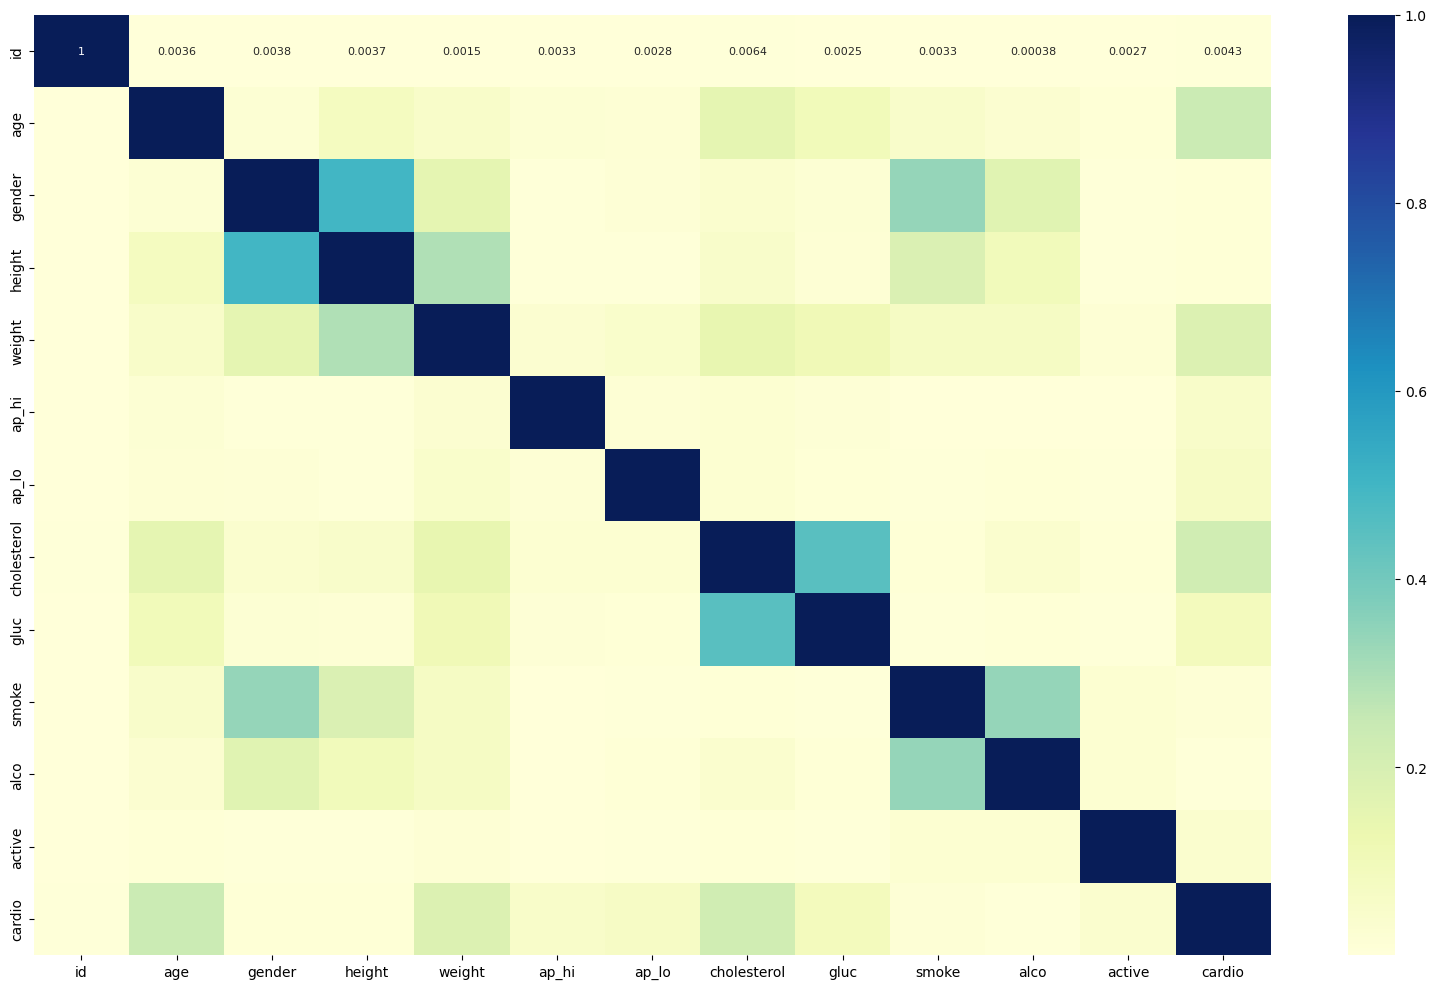

In [5]:
df_corr = df.corr().abs()  # Calculate the absolute correlation matrix
plt.figure(figsize=(16,10))  # Set the figure size
sns.heatmap(df_corr, annot=True, annot_kws={'size': 8}, cmap="YlGnBu")  # Set annotation size for all cells
plt.tight_layout()  # Ensure the layout is tight, so nothing gets cut off
plt.show()  # Display the heatmap

In [6]:
#Seems the height and gender are correlated as per above heatmap, but we need more proof

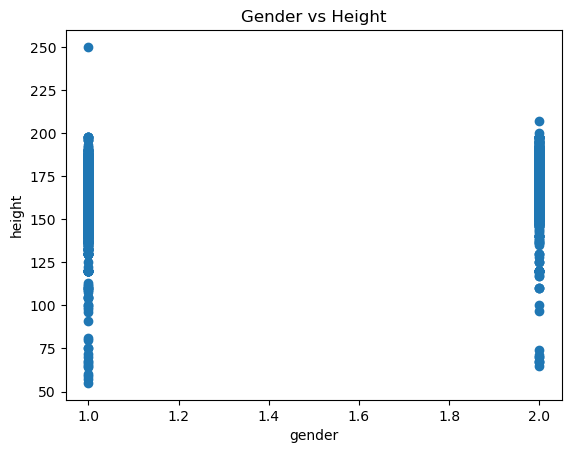

In [7]:
plt.scatter(df.gender, df.height)   # Creates a scatter plot with 'gender' on the x-axis and 'height' on the y-axis from the DataFrame 'df'.
plt.xlabel('gender')                # Labels the x-axis as 'gender'.
plt.ylabel('height')                # Labels the y-axis as 'height'.
plt.title('Gender vs Height')        # Adds the title 'Gender vs Height' to the plot.
plt.show()                          # Displays the plot.


In [23]:
#drop id and remove duplicates
df.drop(['gender'], axis=1, inplace=True)

KeyError: "['gender'] not found in axis"

In [9]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.shape

(67384, 11)

In [18]:
#drop id and remove duplicates
df.drop(['id'], axis=1, inplace=True)

In [25]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000
mean,19466.692241,164.374629,73.563569,126.162086,81.285394,1.361881,1.223495,0.087128,0.053262,0.803959,0.492743
std,2466.912538,7.689291,13.194289,17.857326,10.234383,0.676988,0.569419,0.282024,0.224557,0.397003,0.499951
min,14275.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


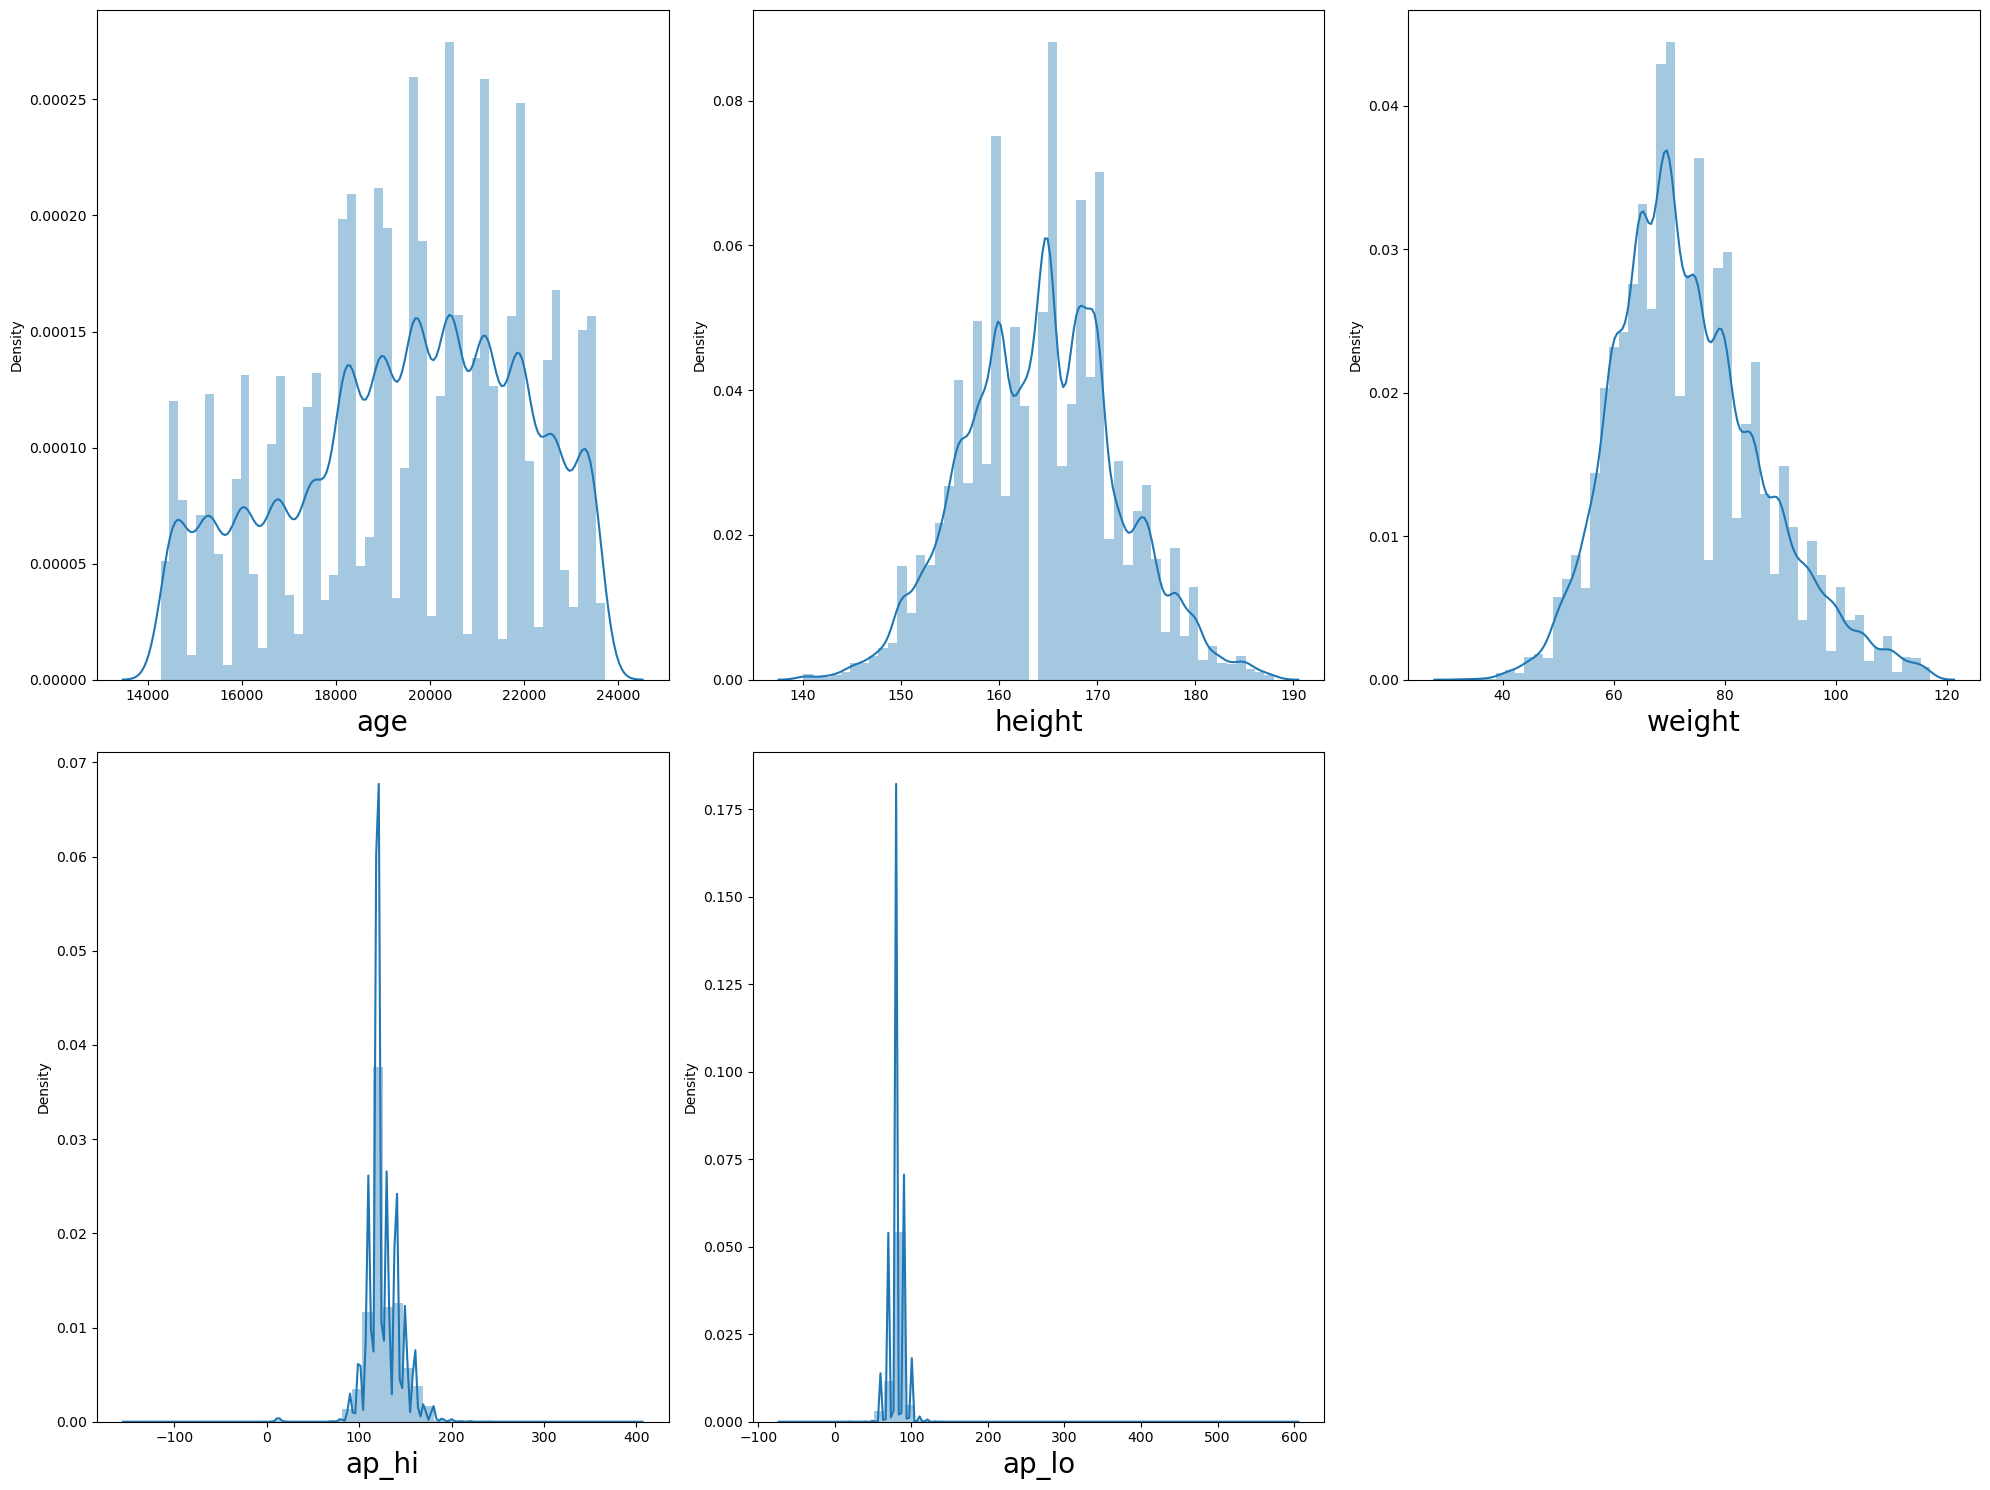

In [27]:
plt.figure(figsize=(20,15))          # Creates a new figure with the specified dimensions (20x15 inches).
plotnumber=1                         # Initializes a variable to keep track of the subplot number.

for column in df[['age','height','weight', 'ap_hi','ap_lo']]:  # Iterates through the selected columns of the DataFrame 'df'.
    if plotnumber <= 6:              # Checks if the plotnumber is within the limit (6 subplots in total).
        ax = plt.subplot(2,3, plotnumber)  # Creates a subplot layout with 2 rows and 3 columns, and assigns each plot to a position.
        sns.distplot(df[column])      # Plots the distribution of the current column using Seaborn's `distplot`.
        plt.xlabel(column, fontsize=20)  # Sets the x-axis label to the column name with a font size of 20.
    plotnumber += 1                   # Increments the subplot number for the next iteration.

plt.tight_layout()                    # Adjusts the layout of subplots to prevent overlap.


### This below code is another way of removing Outliers

In [28]:
#from scipy.stats import zscore

z_score = zscore(df[['age','height','weight', 'ap_hi','ap_lo']])
abs_z_score = np.abs(z_score) # applying thr formula and get thr scaled data

three_sd=(abs_z_score<3).all(axis=1) #featching 3SD
df=df[three_sd] #automatically above 3sd data gone, we selected only 3sd data

In [29]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000
mean,19456.245266,164.376659,73.301742,125.711505,80.952722,1.357054,1.220531,0.086565,0.052469,0.804356,0.486696
std,2467.912805,7.607354,12.880590,15.159336,8.871941,0.673773,0.566499,0.281199,0.222972,0.396698,0.499827
min,14275.000000,142.000000,34.000000,80.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17649.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19697.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21317.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,187.000000,113.000000,179.000000,111.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.shape

(65696, 11)

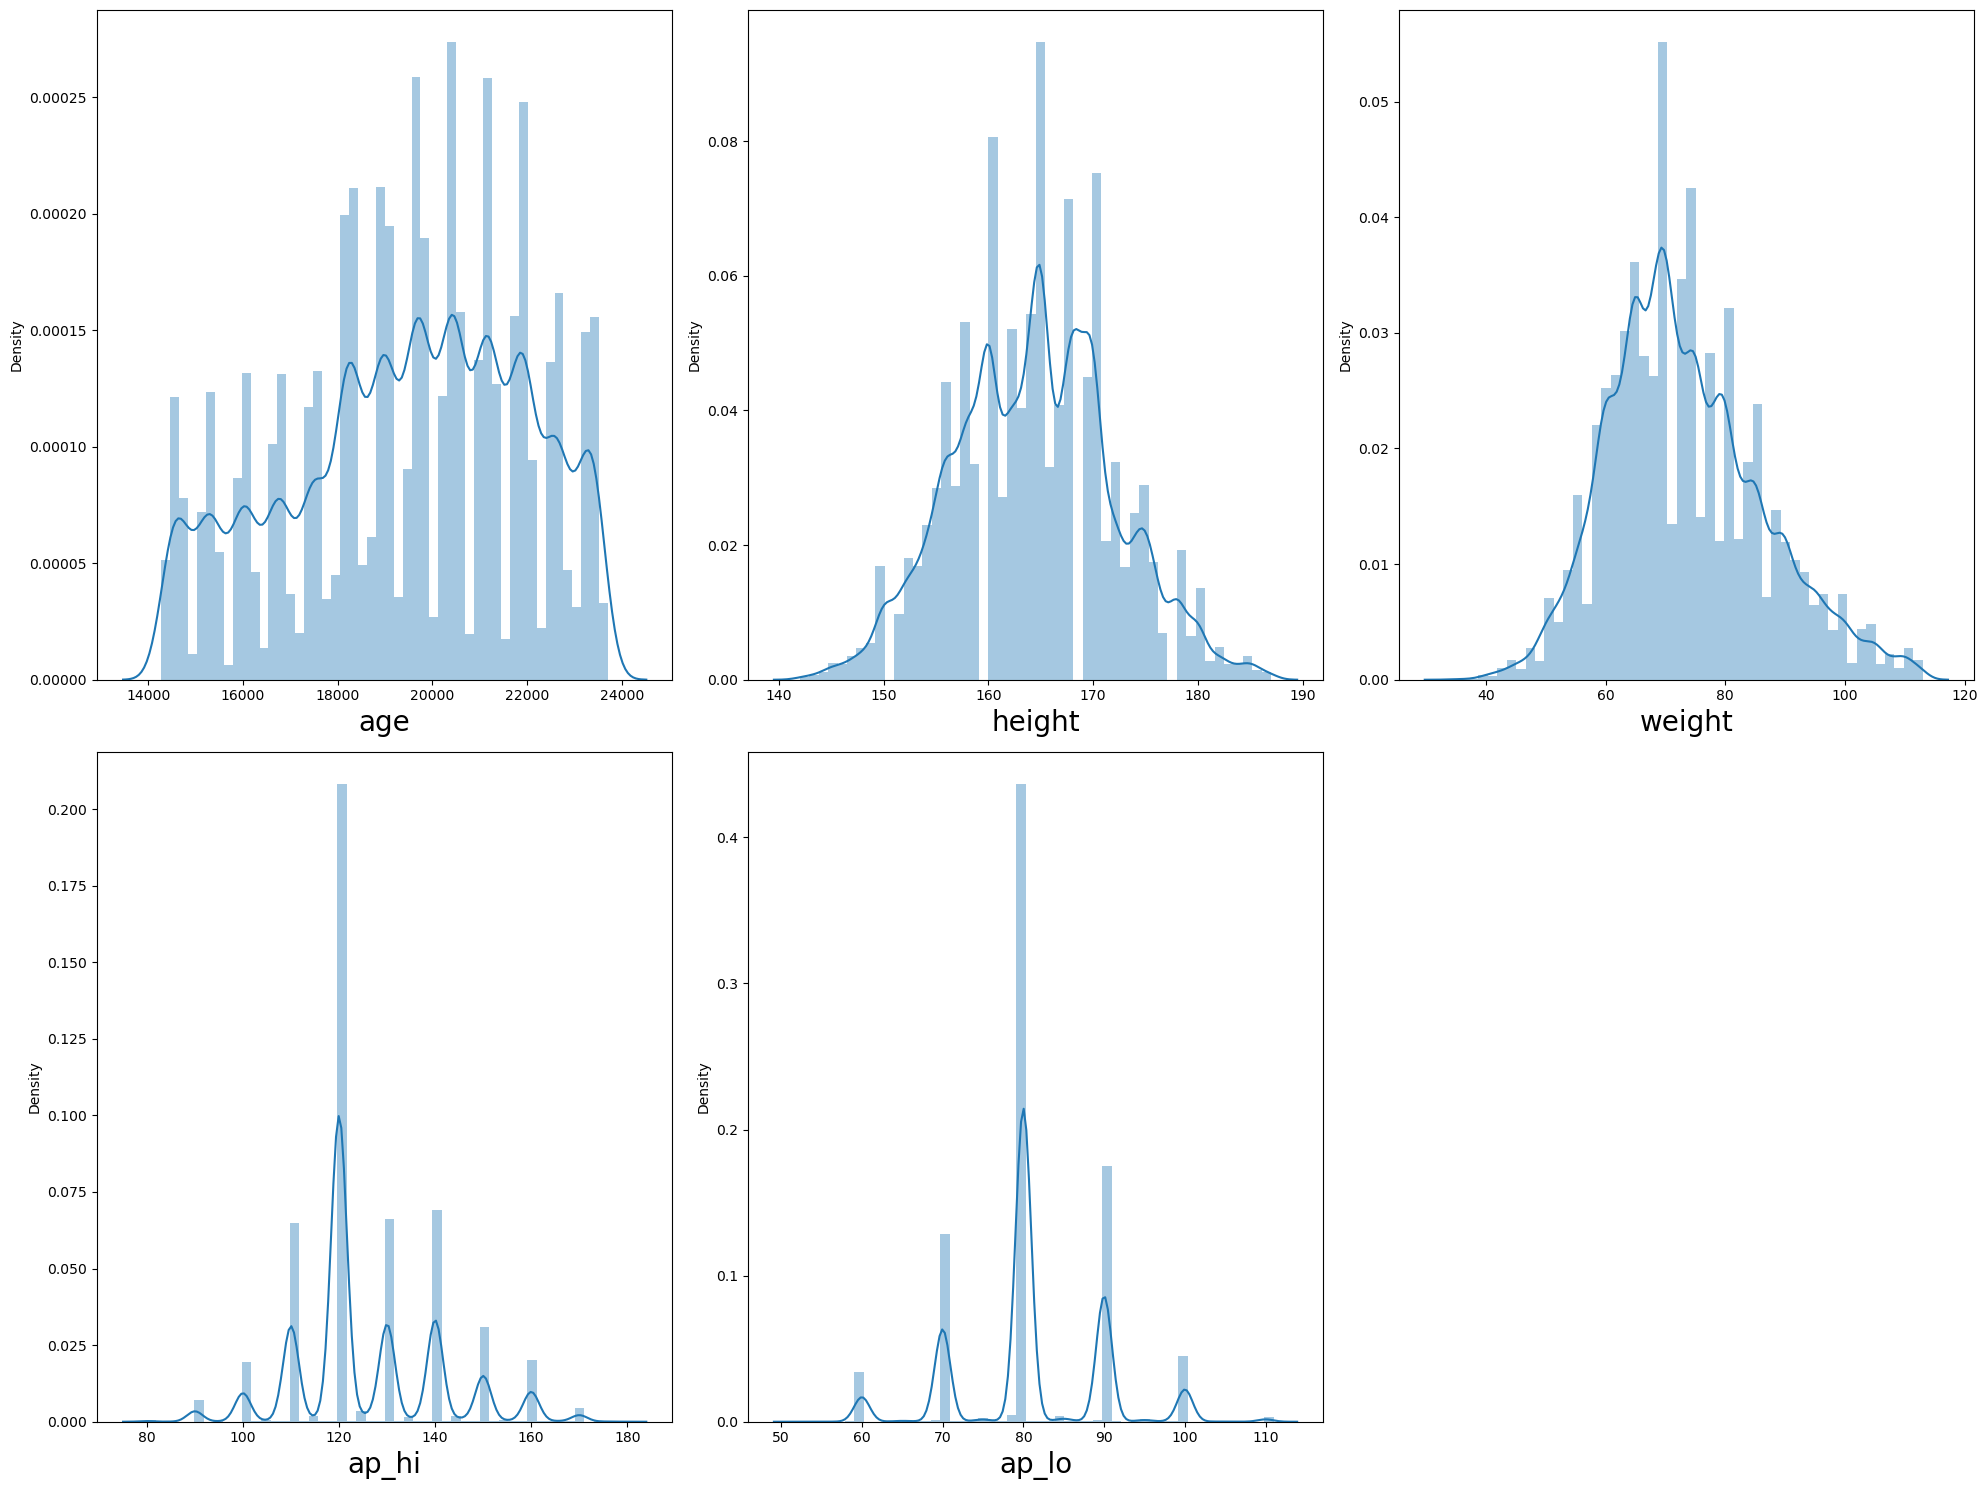

In [31]:
#now see how much skewnees is removed , check ditribution plot

plt.figure(figsize=(20,15))          # Creates a figure with the specified size (20x15 inches) to accommodate all the subplots.
plotnumber = 1                       # Initializes a counter to track the position of each subplot.

for column in df[['age','height','weight', 'ap_hi','ap_lo']]:  # Loops through each of the selected columns in the DataFrame 'df'.
    if plotnumber <= 6:              # Ensures that no more than 6 subplots are created (though in this case, 5 columns are selected).
        ax = plt.subplot(2,3,plotnumber)  # Creates a subplot grid (2 rows, 3 columns) and places the current plot in the 'plotnumber' position.
        sns.distplot(df[column])      # Uses Seaborn’s `distplot` to plot the distribution (histogram + KDE) for each column.
        plt.xlabel(column, fontsize=20)  # Sets the x-axis label to the name of the current column with a larger font size (20).
    plotnumber += 1                   # Increments the counter for the next plot.

plt.tight_layout()                    # Adjusts the spacing between subplots to prevent overlap and improve readability.


In [32]:
X = df.drop(columns=['cardio'], axis=1)
y = df['cardio']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=41)

In [41]:
def metrix_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n============Train Result=============')
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    
    elif train==False:
        pred = clf.predict(x_test)
        print('\n============Test Result==============')
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n Classification Report\n', classification_report(y_test,pred,digits=2))

In [42]:
 #initiate random forest classifier and train
random_clf = RandomForestClassifier()

In [43]:
#train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
metrix_score(random_clf, x_train,x_test,y_train,y_test, train=True)

metrix_score(random_clf, x_train,x_test,y_train,y_test, train=False)


============Train Result=============
Accuracy Score:99.98%

============Test Result==============
Accuracy Score:71.01%

 Classification Report
               precision    recall  f1-score   support

           0       0.71      0.74      0.72     10035
           1       0.71      0.68      0.70      9674

    accuracy                           0.71     19709
   macro avg       0.71      0.71      0.71     19709
weighted avg       0.71      0.71      0.71     19709



In [46]:
#Random forest classifier

params = {
    'n_estimators': [13, 15],           # Number of trees in the forest. Trying two values: 13 and 15.
    'criterion': ['entropy', 'gini'],   # The function to measure the quality of a split. Trying two criteria: 'entropy' and 'gini'.
    'max_depth': [10, 15],              # The maximum depth of the tree. Trying two values: 10 and 15.
    'min_samples_split': [10, 11],      # The minimum number of samples required to split an internal node. Trying two values: 10 and 11.
    'min_samples_leaf': [5, 6]          # The minimum number of samples required to be at a leaf node. Trying two values: 5 and 6.
}


In [47]:
grd = GridSearchCV(random_clf, param_grid=params)
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [48]:
print('best_parameters==>', grd.best_params_)

best_parameters==> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [49]:
random_clf=grd.best_estimator_

In [50]:
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=13)

In [51]:
metrix_score(random_clf, x_train,x_test,y_train,y_test, train=True)

metrix_score(random_clf, x_train,x_test,y_train,y_test, train=False)


============Train Result=============
Accuracy Score:74.72%

============Test Result==============
Accuracy Score:73.27%

 Classification Report
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     10035
           1       0.76      0.66      0.71      9674

    accuracy                           0.73     19709
   macro avg       0.74      0.73      0.73     19709
weighted avg       0.74      0.73      0.73     19709

